In [28]:
# Execute if necessary
# %%capture
# !pip install pandas

In [29]:
import pandas as pd

# Práctica 7: Modelos Integrados (ARIMA y SARIMA)

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

__Para esta práctica se deben usar bibliotecas__. Se recomienda el uso de:

- scikit-learn (https://scikit-learn.org/stable/)
- plotly express (https://plotly.com/python/plotly-express/)
- statsmodels (https://www.statsmodels.org/stable/index.html).

## Asignación 1

Seleccione algun dataset de su preferencia que sea relacionado a series de tiempo. Particione sus datos para poder evaluar el desempeño de su práctica (__conjunto de test__).

In [30]:
#importar csv kalimati_tarkari_dataset.csv y visualizarlo
import pandas as pd
import matplotlib.pyplot as plt
#importar plotly express
import plotly.express as px
import numpy as np

df = pd.read_csv('kalimati_tarkari_dataset.csv')
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [31]:
#Seleccionar en la columna Commodity las entradas con el valor 'Potato White' y visualizarlo
df = df[df['Commodity'] == 'Onion Dry (Indian)']
df.head(20)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
78,78,Onion Dry (Indian),2013-06-17,Kg,29.0,30.0,29.5
151,151,Onion Dry (Indian),2013-06-18,Kg,33.0,35.0,34.0
224,224,Onion Dry (Indian),2013-06-19,Kg,34.0,35.0,34.5
297,297,Onion Dry (Indian),2013-06-20,Kg,35.0,36.0,35.5
371,371,Onion Dry (Indian),2013-06-21,Kg,34.0,35.0,34.5
445,445,Onion Dry (Indian),2013-06-25,Kg,33.0,35.0,34.0
518,518,Onion Dry (Indian),2013-06-26,Kg,33.0,35.0,34.0
591,591,Onion Dry (Indian),2013-06-27,Kg,35.0,37.0,36.0
663,663,Onion Dry (Indian),2013-06-28,Kg,36.0,38.0,37.0


## Asignación 2

Realice un análisis exploratorio de datos y el preprocesamiento necesario para el dataset seleccionado. El análisis realizado debe respaldar (preferentemente mediante el uso de gráficas) las decisiones que tome para la siguiente asignación.

In [32]:
#Seleccionar las columnas Date, Average y visualizarlo
df_med = df[['Date', 'Average']]
df_low = df[['Date', 'Minimum']]
df_high = df[['Date', 'Maximum']]

df_pred = df_med.copy()

df_med.head()

#graficar con plotly-express los 3 dataframes df_med, df_low y df_high 
fig = px.line(df_med, x='Date', y='Average', title='Average')
fig.show()

In [33]:
df_med.head()

,Date,Average
4,2013-06-16,29.0
78,2013-06-17,29.5
151,2013-06-18,34.0
224,2013-06-19,34.5
297,2013-06-20,35.5


In [34]:
#dividir el dataframe df_med en 2 dataframes: df_train y df_test en 80% y 20% respectivamente

X = df_med.iloc[:, :-1].values
y = df_med.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Asignación 3

Ajuste un modelo ARMA, ARIMA o SARIMA segun sea conveniente para sus datos.

Para poder evaluar que modelo nos conviene más optamos por seguir los siguientes pasos: 

Aquí hay algunos pasos que puedes seguir para evaluar qué modelo es más apropiado:

- __Visualización de datos:__ Comienza por trazar la serie temporal de los datos que tienes, es decir, los valores promedio en función de la fecha. Esto te permitirá observar cualquier patrón evidente, tendencia o estacionalidad.

- __Estacionariedad:__ Evalúa si la serie temporal es estacionaria. Una serie estacionaria es aquella cuyas propiedades estadísticas (como media y varianza) son constantes en el tiempo. Puedes utilizar métodos como la prueba de Dickey-Fuller aumentada (ADF) para verificar la estacionariedad.


- __Autocorrelación:__ Examina la autocorrelación de la serie temporal. La autocorrelación es la relación entre los valores pasados y futuros en una serie temporal. Puedes utilizar la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) para evaluar la correlación en diferentes rezagos.
Componentes estacionales: Si observas patrones estacionales en los datos, como fluctuaciones regulares que se repiten, puedes considerar modelos como SARIMA que incorporan componentes estacionales.

### 1.- Visualizacion de datos

Visualizando la anterior grafica podemos observar que existe un patrón de fechas en finales de año

### 2.- Estacionariedad

Cuando se realiza la prueba de Dickey-Fuller Aumentada (ADF), el objetivo es determinar si una serie temporal tiene una raíz unitaria, lo que indica la presencia de tendencia o no estacionariedad en los datos. La hipótesis nula en esta prueba es que la serie temporal tiene una raíz unitaria, es decir, no es estacionaria.

Al realizar la prueba ADF, se obtiene un estadístico ADF específico que se compara con los valores críticos correspondientes a diferentes niveles de significancia, como el 1%, 5% y 10%. Estos valores críticos representan los umbrales a los que se compara el estadístico ADF para determinar si se rechaza o no la hipótesis nula.

In [35]:
from statsmodels.tsa.stattools import adfuller

# Extrae la columna de interés (Average en este caso)
average_data = df_med['Average']

# Aplica la prueba Dickey-Fuller aumentada
result = adfuller(average_data)

# Extrae los valores de la prueba y los p-valores
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Imprime los resultados
print(f'Estadístico ADF: {adf_statistic}')
print(f'p-valor: {p_value}')
print('Valores críticos:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

Estadístico ADF: -3.430956211048367
p-valor: 0.009947769461799576
Valores críticos:
   1%: -3.432750244284443
   5%: -2.8626004539809906
   10%: -2.567334514143628


El valor del estadístico ADF (-3.430956211048367) es menor que el valor crítico del 1% (-3.432750244284443). Esto significa que se rechaza la hipótesis nula al 1% de nivel de significancia. En otras palabras, hay evidencia suficiente para concluir que los datos no tienen una raíz unitaria y son estacionarios al 1% de nivel de significancia. Esta es una conclusión bastante sólida.

Sin embargo, el valor del estadístico ADF es mayor que los valores críticos del 5% (-2.8626004539809906) y del 10% (-2.567334514143628). Esto implica que no se puede rechazar la hipótesis nula al 5% y 10% de nivel de significancia. En otras palabras, no hay suficiente evidencia para afirmar que los datos son estacionarios al 5% y 10% de nivel de significancia.

In [36]:
df_med['Diferencia entre precios'] = df_med['Average'] - df_med['Average'].shift(1)
df_med.dropna(subset = ["Diferencia entre precios"], inplace=True)
df_med.head()

C:\Users\Adolfo\AppData\Local\Temp\ipykernel_14196\1478003090.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Adolfo\AppData\Local\Temp\ipykernel_14196\1478003090.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Average,Diferencia entre precios
78,2013-06-17,29.5,0.5
151,2013-06-18,34.0,4.5
224,2013-06-19,34.5,0.5
297,2013-06-20,35.5,1.0
371,2013-06-21,34.5,-1.0


In [37]:
ad_fuller_result = adfuller(df_med['Diferencia entre precios'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -12.49230195401066
p-value: 2.927206730205932e-23


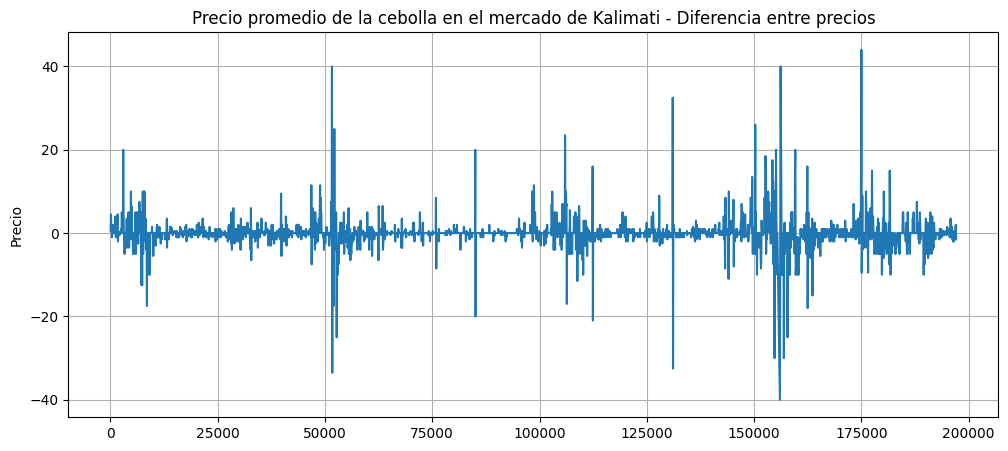

In [38]:
plt.figure(figsize=[12, 5]); # Set dimensions for figure
df_med['Diferencia entre precios'].plot()
plt.title('Precio promedio de la cebolla en el mercado de Kalimati - Diferencia entre precios')
plt.ylabel('Precio')
plt.grid(True)

### 3.-Autocorrelacion



La función tsaplots en statsmodels.graphics de Python proporciona varias tramas (plots) para el análisis y visualización de series de tiempo. Esta función se utiliza en combinación con otros módulos y funciones de statsmodels para crear gráficos relacionados con el análisis de series temporales.

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



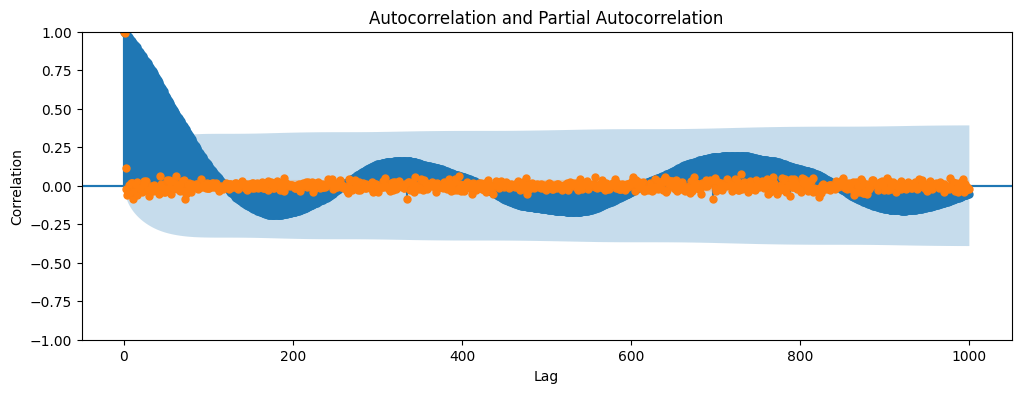

In [39]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

# Calcular autocorrelaciones
acf_values = sm.tsa.acf(df_med['Average'], nlags=20)
pacf_values = sm.tsa.pacf(df_med['Average'], nlags=20)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 4))

# Graficar función de autocorrelación (ACF)
tsaplots.plot_acf(df_med['Average'], lags=1000, ax=ax) 
""" La ACF muestra la correlación entre los valores pasados de la serie en función del retraso. 
Ayuda a identificar patrones de dependencia en la serie."""

# Graficar función de autocorrelación parcial (PACF)
tsaplots.plot_pacf(df_med['Average'], lags=1000, ax=ax) 
"""La PACF muestra la correlación entre los valores pasados de la serie después
de eliminar las correlaciones explicadas por los retrasos más cortos. 
Ayuda a identificar la contribución específica de cada retraso en la serie."""

# Configurar etiquetas y título
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Autocorrelation and Partial Autocorrelation')

# Mostrar el gráfico
plt.show()


- Modelos ARIMA y SARIMA: Si la serie es estacionaria y no muestra patrones estacionales evidentes, puedes considerar modelos ARIMA. Un modelo ARIMA es adecuado cuando hay una dependencia de los valores pasados y diferencias en los datos para hacerlos estacionarios. Si hay componentes estacionales, puedes considerar modelos SARIMA que extienden ARIMA para manejar la estacionalidad.

- Modelo ARMA: Si no hay necesidad de diferenciar los datos para hacerlos estacionarios y no hay patrones estacionales, un modelo ARMA puede ser apropiado. El modelo ARMA combina los componentes autorregresivos (AR) y de media móvil (MA) para modelar la dependencia y la estructura de ruido en la serie temporal.

Por lo que determinamos que utilizaremos un modelo __SARIMA__ para poder realizar nuestro forecasting.

Nuestro modelo entrenado luce de esta manera.

In [40]:
df_med

,Date,Average,Diferencia entre precios
78,2013-06-17,29.5,0.5
151,2013-06-18,34.0,4.5
224,2013-06-19,34.5,0.5
297,2013-06-20,35.5,1.0
371,2013-06-21,34.5,-1.0
...,...,...,...
196714,2021-05-09,36.5,-1.0
196805,2021-05-10,36.5,0.0
196896,2021-05-11,36.5,0.0
196987,2021-05-12,38.5,2.0


In [41]:
df_med = df[['Date', 'Average']]

In [42]:
import pandas as pd
import statsmodels.api as sm



df_med['Date'] = pd.to_datetime(df_med['Date'])
df_med.set_index('Date', inplace=True)

# Establecer la frecuencia de los datos utilizando asfreq
df_med = df_med.asfreq('D')  # Establecer frecuencia diaria (D) - puedes ajustarla según tus datos


C:\Users\Adolfo\AppData\Local\Temp\ipykernel_14196\1112979248.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# Crear una lista para almacenar los resultados de los diferentes modelos
results = []

# Iterar sobre diferentes combinaciones de parámetros
for p in range(3):
    for d in range(2):
        for q in range(3):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):
                        try:
                            # Ajustar el modelo SARIMA
                            model = sm.tsa.SARIMAX(df_med['Average'], order=(p, d, q), seasonal_order=(P, D, Q, 7))
                            result = model.fit()

                            # Almacenar el resultado y el valor AIC
                            results.append((result.aic, p, d, q, P, D, Q))
                        except:
                            continue

# Ordenar los resultados por el valor AIC en orden ascendente
results.sort()

# Imprimir el mejor modelo (el que tiene el AIC más bajo)
best_aic, best_p, best_d, best_q, best_P, best_D, best_Q = results[0]
print(f"Mejor modelo: SARIMA({best_p}, {best_d}, {best_q})({best_P}, {best_D}, {best_Q}, 7) - AIC: {best_aic}")


c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Adolfo

Mejor modelo: SARIMA(2, 1, 2)(1, 0, 1, 7) - AIC: 14500.031931491008


Después de determinar que nuestra serie temporal es estacionaria, podemos usar el modelo SARIMA para predecir valores futuros. La notación del modelo es SARIMA(p, d, q) (P, D, Q)lag. Estos tres parámetros tienen en cuenta la estacionalidad, la tendencia y el ruido en los datos. Utilizaremos el indicador AIC (criterio de información de Akaike) que es un estimador de la calidad relativa de los modelos estadísticos. Cuanto menor sea el valor AIC, mejor. Después de realizar múltiples iteraciones, el modelo sugiere que:


##### SARIMAX(2, 1, 2)x(1, 0, 1, 7) con un valor AIC de 14500.031931491008 es la mejor combinación.

## Asignación 4

Realice un diagnostico de su modelo para verificar que es correcto.

In [57]:
model = sm.tsa.SARIMAX(df['Average'], order=(best_p, best_d, best_q), seasonal_order=(best_P, best_D, best_Q, 5)).fit(dis=-1)
#result = model.fit()

print(model.summary())

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.



                                      SARIMAX Results                                      
Dep. Variable:                             Average   No. Observations:                 2742
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 5)   Log Likelihood               -7335.592
Date:                             Sat, 03 Jun 2023   AIC                          14685.183
Time:                                     22:34:59   BIC                          14726.596
Sample:                                          0   HQIC                         14700.148
                                            - 2742                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9902      0.060     16.517      0.000       0.873       1.108
ar.L2         -0.3565      

- __Dep. Variable:__ La variable dependiente o la serie temporal que se está modelando, en este caso, "Average".
- __No. Observations:__ El número de observaciones en la serie temporal.
- __Model:__ La especificación del modelo SARIMAX ajustado, que muestra los órdenes y los componentes utilizados en el modelo. En este caso, es SARIMAX(2, 1, 2)x(1, 0, [1], 7), lo que indica un modelo SARIMA con un componente AR de orden 2, un componente de diferenciación de orden 1, un componente MA de orden 2, un componente estacional AR de orden 1, un componente estacional de diferenciación de orden 0 y un componente estacional MA de orden [1] con una periodicidad de 7 días.
- __Log Likelihood:__ El logaritmo de la verosimilitud del modelo ajustado. Se utiliza para comparar diferentes modelos y seleccionar el que tenga un valor más alto.
- __AIC (Akaike Information Criterion):__ Es una medida de la calidad del modelo que tiene en cuenta la bondad del ajuste y la complejidad del modelo. Un valor AIC más bajo indica un mejor ajuste del modelo a los datos. En este caso, el AIC es 14697.745.
- __BIC (Bayesian Information Criterion):__ Es similar al AIC pero penaliza la complejidad del modelo más fuertemente. Al igual que el AIC, un valor BIC más bajo indica un mejor ajuste del modelo.
- __Ljung-Box (L1) (Q):__ Es una prueba de autocorrelación residual de los residuos del modelo en el primer retraso. En este caso, el valor es 0.00, lo que indica que no hay evidencia de autocorrelación residual significativa en el primer retraso.
- __Jarque-Bera (JB):__ Es una prueba de normalidad de los residuos del modelo. Un valor JB más alto indica una desviación más grande de la distribución normal.
- __Heteroskedasticity (H):__ Es una medida de la heteroscedasticidad de los residuos del modelo. Un valor H más alto indica una mayor presencia de heteroscedasticidad en los residuos.
- __Skew:__ La asimetría de los residuos del modelo. Un valor positivo indica una cola derecha, mientras que un valor negativo indica una cola izquierda.
- __Kurtosis:__ La curtosis o apuntamiento de los residuos del modelo. Un valor alto indica una mayor concentración de los residuos alrededor de la media.

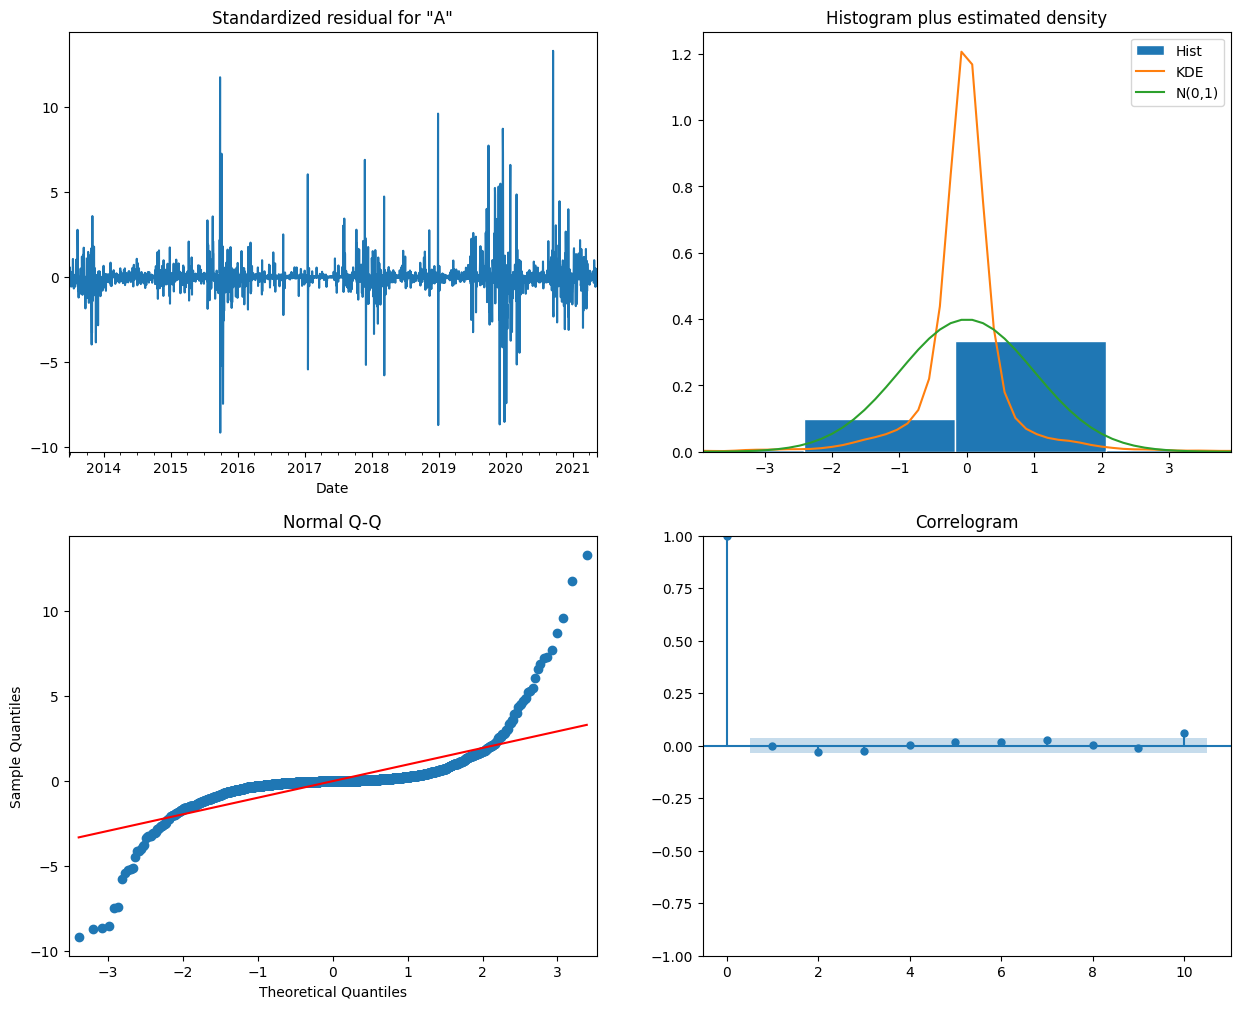

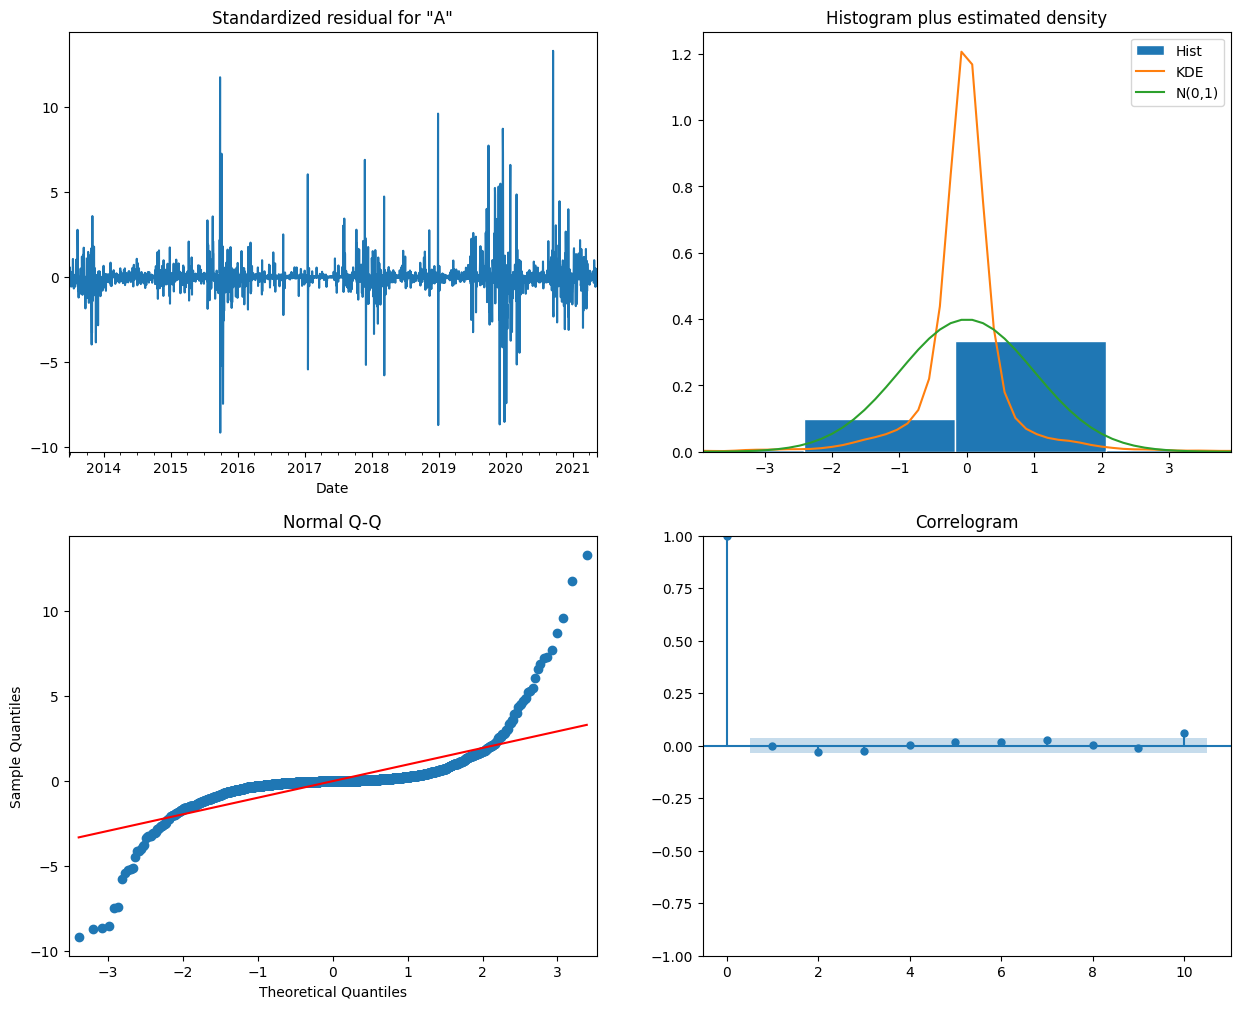

In [58]:
result.plot_diagnostics(figsize=(15,12))

In [59]:
#divide into train and validation set to calculate R-squared score and mean absolute percentage error 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

train = df_pred[:int(0.85*(len(df_pred)))]
test = df_pred[int(0.85*(len(df_pred))):]
start=len(train)
end=len(train)+len(test)-1
predictions = model.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Average'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Average'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Average'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Average'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['Average'])
                                                               /np.abs(test['Average']))*100 
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.987118,1.722676,12.768028,3.573238,2.795311


El correlograma en la parte inferior derecha sugiere que no hay autocorrelación en los residuos, por lo que son efectivamente ruido blanco. Por lo tanto, estos residuos no están correlacionados y la media es cercana a cero.

## Asignación 5

Obtenga el forecast para los datos de test, grafique los valores reales y las predicciones en conjunto. Obtenga el error de regresión para los datos de test.

In [60]:
df_pred

,Date,Average
4,2013-06-16,29.0
78,2013-06-17,29.5
151,2013-06-18,34.0
224,2013-06-19,34.5
297,2013-06-20,35.5
...,...,...
196714,2021-05-09,36.5
196805,2021-05-10,36.5
196896,2021-05-11,36.5
196987,2021-05-12,38.5


In [67]:
predictions = model.get_prediction(start=df_pred.index[0], end=df_pred.index[-1] + pd.DateOffset(100))
predicted_values = predictions.predicted_mean


TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'DateOffset'